In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BANKRUPTCY PREDICTION .csv')
df.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)  ...   Net Income to Total Assets  \
0                               0.780985  ...                     0.716845   
1                               0.781506  ...                     0.795297   
2                               0.780284  ...                     0.774670   
3                               0.781241  ...                     0.739555   
4                               0.781550  ...                     0.795016   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                    0.009219             0.622879                0.601453   
1                    0.008323             0.623652                0.610237   
2                    0.040003             0.623841                0.601449   
3                    0.003252             0.622929                0.583538   
4                    0.003878             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Equity to Liability  \
0                                           0.564050                0.016469   
1                                           0.570175                0.020794  

In [3]:
df.shape

(6819, 95)

In [4]:
df.dtypes

 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
 Realized Sales Gross Margin                                float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Equity to Liability                                        float64
Bankrupt                                                      int64
Length: 95, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

In [6]:
#percentage of null values in col-
df.isnull().sum()/len(df)*100

 ROA(C) before interest and depreciation before interest    0.0
 ROA(A) before interest and % after tax                     0.0
 ROA(B) before interest and depreciation after tax          0.0
 Operating Gross Margin                                     0.0
 Realized Sales Gross Margin                                0.0
                                                           ... 
 Liability to Equity                                        0.0
 Degree of Financial Leverage (DFL)                         0.0
 Interest Coverage Ratio (Interest expense to EBIT)         0.0
 Equity to Liability                                        0.0
Bankrupt                                                    0.0
Length: 95, dtype: float64

In [7]:
df.describe()

ROA(C) before interest and depreciation before interest  \
count                                        6819.000000          
mean                                            0.505180          
std                                             0.060686          
min                                             0.000000          
25%                                             0.476527          
50%                                             0.502706          
75%                                             0.535563          
max                                             1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)  ...  \
count                            6819.000000  ...   
mean                                0.781381  ...   
std                                 0.012679  ...   
min                                 0.000000  ...   
25%                                 0.781567  ...   
50%                                 0.781635  ...   
75%                                 0.781735  ...   
max 

In [8]:
df.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan �',
       ' Operating Profit Per Share (Yuan �',
       ' Per Share Net profit before tax (Yuan �',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', '

### analyzing data and gathering insights-

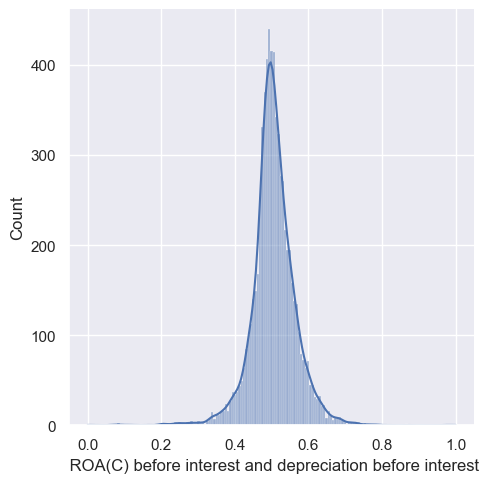

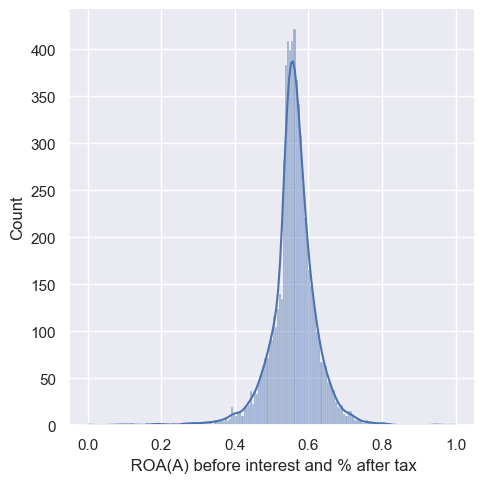

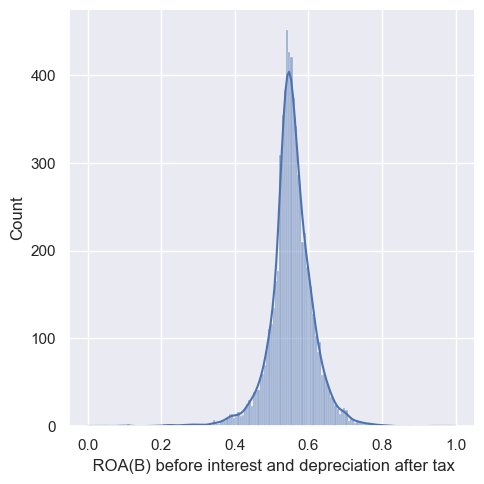

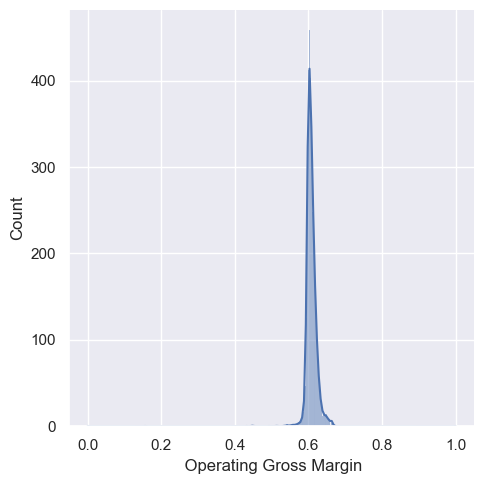

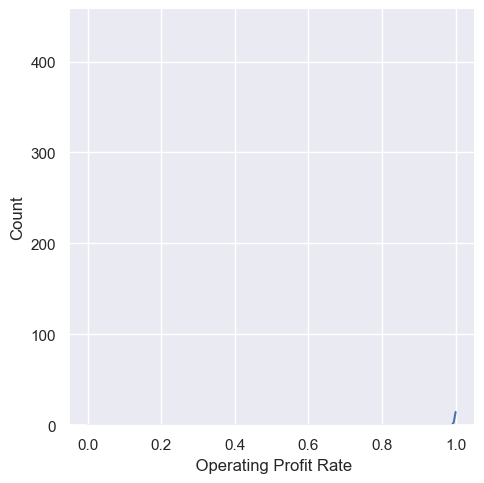

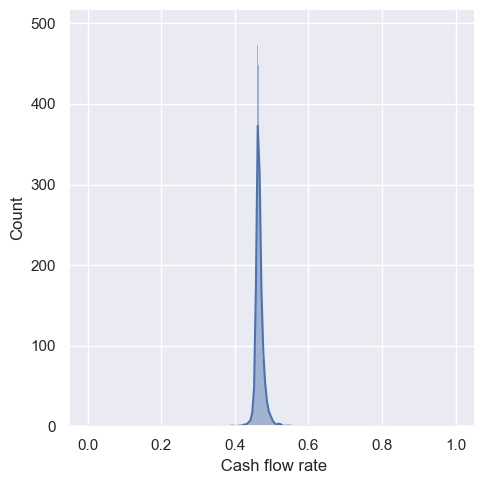

In [10]:
# checking distribution of some variables-
cols1 = [' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
        ' Operating Gross Margin',' Operating Profit Rate',
        ' Cash flow rate']
for i in cols1:
    
    sns.displot(df[i],kde = True)
    plt.show()

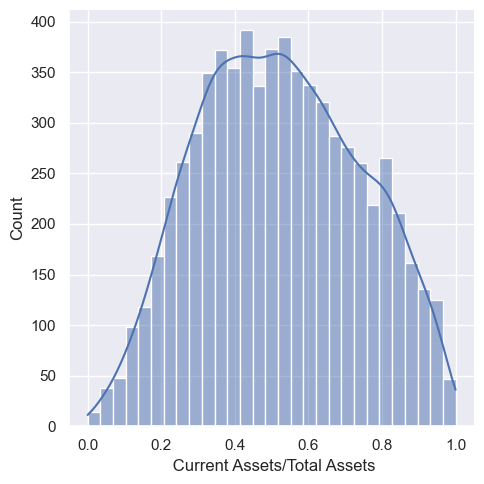

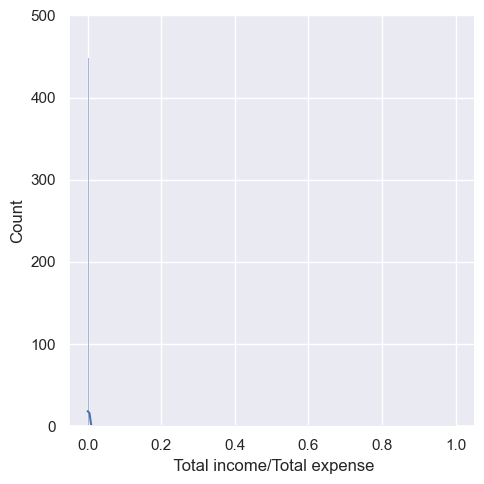

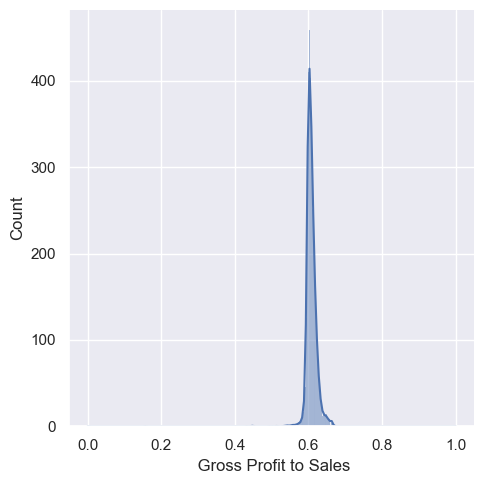

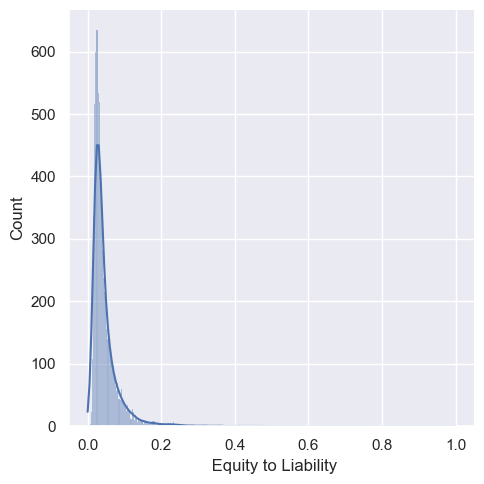

In [12]:
# cols2 = [' Current Assets/Total Assets',' Total income/Total expense',' Gross Profit to Sales',
#         ' Equity to Liability']
# for i in cols2:
    
#     sns.displot(df[i],kde = True)
#     plt.show()

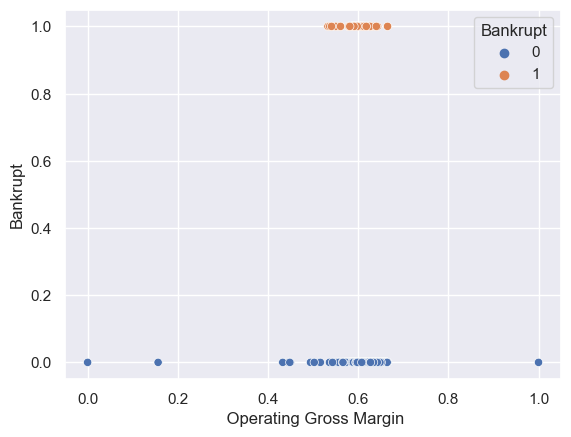

In [11]:
sns.scatterplot( x = df[' Operating Gross Margin'],y = df['Bankrupt'],hue=df['Bankrupt'])
plt.show()

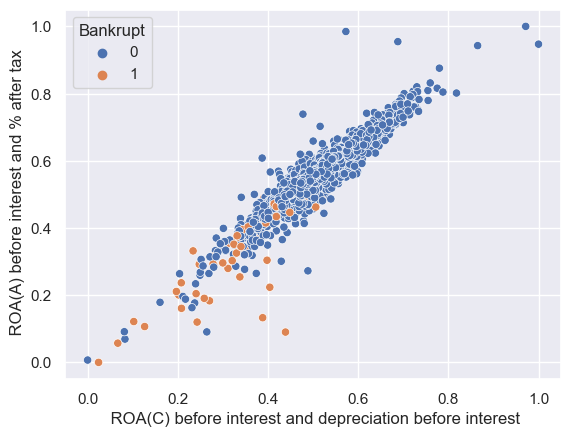

In [12]:
sns.scatterplot( x = df[' ROA(C) before interest and depreciation before interest'],y = df[' ROA(A) before interest and % after tax'],hue=df['Bankrupt'])
plt.show()

In [13]:
# plotting pair-wise -
from itertools import combinations
test_list = [' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan �',
       ' Operating Profit Per Share (Yuan �',
       ' Per Share Net profit before tax (Yuan �',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %',
       ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Long-term fund suitability ratio (A)', ' Borrowing dependency',
       ' Contingent liabilities/Net worth',
       ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital',
       ' Inventory and accounts receivable/Net value', ' Total Asset Turnover',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',
       ' Net Worth Turnover Rate (times)', ' Revenue per person',
       ' Operating profit per person', ' Allocation rate per person',
       ' Working Capital to Total Assets', ' Quick Assets/Total Assets',
       ' Current Assets/Total Assets', ' Cash/Total Assets',
       ' Quick Assets/Current Liability', ' Cash/Current Liability',
       ' Current Liability to Assets', ' Operating Funds to Liability',
       ' Inventory/Working Capital', ' Inventory/Current Liability',
       ' Current Liabilities/Liability', ' Working Capital/Equity',
       ' Current Liabilities/Equity', ' Long-term Liability to Current Assets',
       ' Retained Earnings to Total Assets', ' Total income/Total expense',
       ' Total expense/Assets', ' Current Asset Turnover Rate',
       ' Quick Asset Turnover Rate', ' Working capitcal Turnover Rate',
       ' Cash Turnover Rate', ' Cash Flow to Sales', ' Fixed Assets to Assets',
       ' Current Liability to Liability', ' Current Liability to Equity',
       ' Equity to Long-term Liability', ' Cash Flow to Total Assets',
       ' Cash Flow to Liability', ' CFO to Assets', ' Cash Flow to Equity',
       ' Current Liability to Current Assets', ' Liability-Assets Flag',
       ' Net Income to Total Assets', ' Total assets to GNP price',
       ' No-credit Interval', ' Gross Profit to Sales',
       " Net Income to Stockholder's Equity", ' Liability to Equity',
       ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Equity to Liability', 'Bankrupt']
res = list(combinations(test_list, 2))
res[0]


(' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax')

In [14]:
res[0][0]

' ROA(C) before interest and depreciation before interest'

In [15]:
## as pairplot was taking some time , i wrote this user difined function,  it will take some time to run - 
# for i in range(len(res)):
#     sns.scatterplot( x = df[res[i][0]],y = df[res[i][1]],hue=df['Bankrupt'])
#     plt.show()
    
               
               
               

In [16]:
features = [' ROA(A) before interest and % after tax',' Net Value Per Share (B)',
            ' Net Value Per Share (A)',
            ' Net Value Per Share (C)',' Persistent EPS in the Last Four Seasons',
           ' Debt ratio %',' Net worth/Assets',' Net Income to Total Assets']

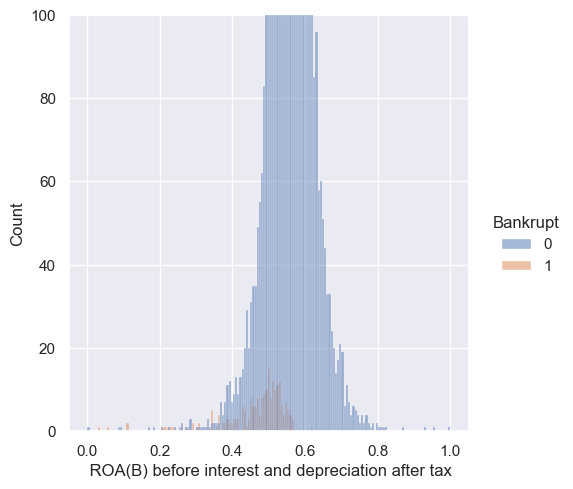

In [17]:
sns.displot(x = df[' ROA(B) before interest and depreciation after tax'],hue=df['Bankrupt'], data = df)
plt.ylim(0,100)
plt.show()

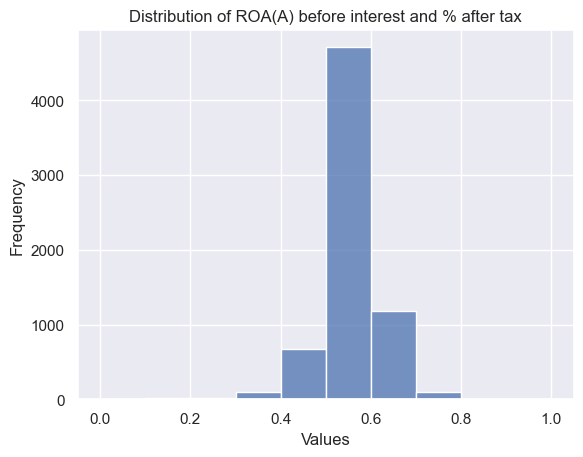

In [18]:
sns.histplot(df[' ROA(A) before interest and % after tax'], bins=10)
plt.title('Distribution of ROA(A) before interest and % after tax')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [19]:
num = df[df[' ROA(C) before interest and depreciation before interest']<0.47]
num.shape

(1384, 95)

In [20]:
df[' ROA(C) before interest and depreciation before interest'].describe()

count    6819.000000
mean        0.505180
std         0.060686
min         0.000000
25%         0.476527
50%         0.502706
75%         0.535563
max         1.000000
Name:  ROA(C) before interest and depreciation before interest, dtype: float64

In [21]:
roa_Cn = df[(df[' ROA(C) before interest and depreciation before interest'] <0.47) & (df['Bankrupt'] == 0)]
roa_Cn.shape

(1217, 95)

In [22]:
roa_C = df[(df[' ROA(C) before interest and depreciation before interest'] <0.47) & (df['Bankrupt'] == 1)]
roa_C.shape

(167, 95)

In [23]:
df['Bankrupt'].value_counts()

0    6599
1     220
Name: Bankrupt, dtype: int64

Specifically, out of the total of 220 bankrupt firms, 167 of them have ROA(C) values below 25% of the average, indicating a higher likelihood of bankruptcy for firms with lower values of column ROA(C). On the other hand, out of the total of 6600 non-bankrupt firms, 1217 of them have column ROA(C) values below 25% of the average, suggesting that a smaller proportion(18%) of non-bankrupt firms also have lower values of column ROA(C).

This could potentially indicate that firms with lower values of column ROA(C) are more likely to face financial distress or bankruptcy, but there may still be a considerable number of non-bankrupt firms with low values of column ROA(C). It suggests that the value of column ROA(C) may be an important predictor or indicator of the financial health of firms.

when ' ROA(C) before interest and depreciation before interest' value
for a firm is below 25% of avg value with respect to others, we got 167 firms which 
were classified as bankrupt which is 75.91% of total bankrupt firms and when its below mean 0.5051 the percentage is 95.45%

<Axes: xlabel=' ROA(C) before interest and depreciation before interest', ylabel='Density'>

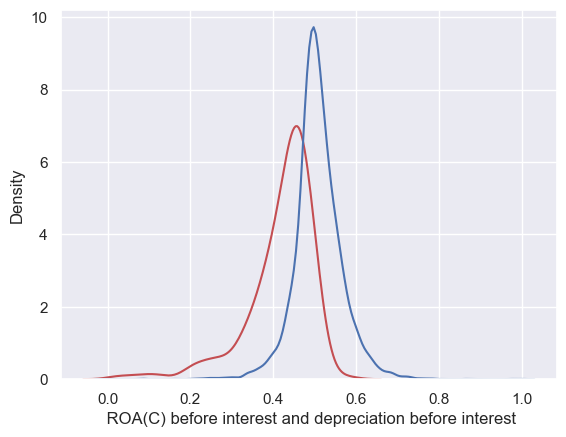

In [24]:
sns.distplot(df[df['Bankrupt']==1][' ROA(C) before interest and depreciation before interest'],hist=False,color='r')
sns.distplot(df[df['Bankrupt']==0][' ROA(C) before interest and depreciation before interest'],hist=False)

In [25]:
df[' ROA(A) before interest and % after tax'].describe()

count    6819.000000
mean        0.558625
std         0.065620
min         0.000000
25%         0.535543
50%         0.559802
75%         0.589157
max         1.000000
Name:  ROA(A) before interest and % after tax, dtype: float64

In [26]:
roa_a = roa_Cn = df[(df[' ROA(A) before interest and % after tax'] <0.53) & (df['Bankrupt'] == 1)]
roa_a.shape

(168, 95)

<Axes: xlabel=' ROA(A) before interest and % after tax', ylabel='Density'>

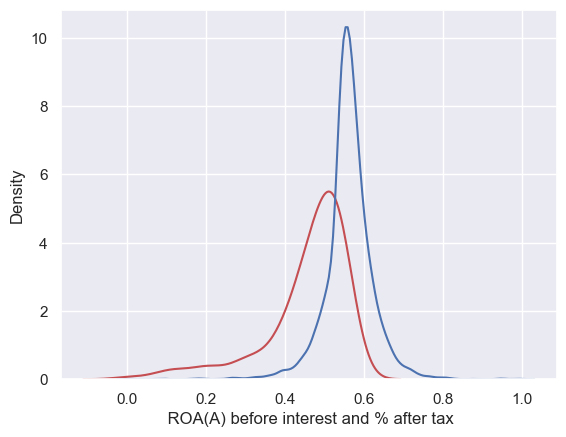

In [27]:
sns.distplot(df[df['Bankrupt']==1][' ROA(A) before interest and % after tax'],hist=False,color='r')
sns.distplot(df[df['Bankrupt']==0][' ROA(A) before interest and % after tax'],hist=False)

similarly, when ' ROA(A) before interest and % after tax' value for a firm is below 25% of avg value with respect to others, we got 168 banks which were classified as bankrupt which is 76.31% of total bankrupt firms.

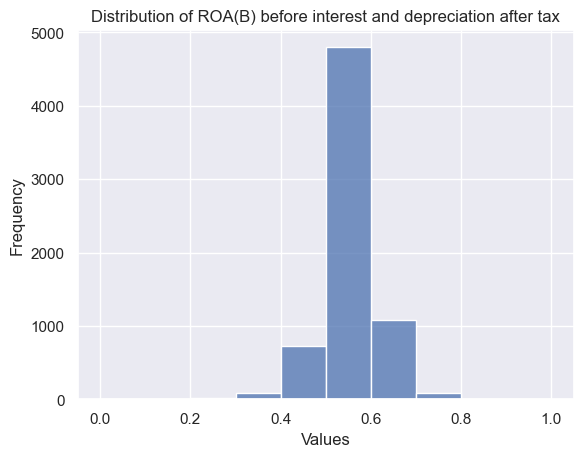

In [28]:
sns.histplot(df[' ROA(B) before interest and depreciation after tax'], bins=10)
plt.title('Distribution of ROA(B) before interest and depreciation after tax')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [29]:
df[' ROA(B) before interest and depreciation after tax'].describe()

count    6819.000000
mean        0.553589
std         0.061595
min         0.000000
25%         0.527277
50%         0.552278
75%         0.584105
max         1.000000
Name:  ROA(B) before interest and depreciation after tax, dtype: float64

In [30]:
roa_b = df[(df[' ROA(B) before interest and depreciation after tax'] <0.52) & (df['Bankrupt'] == 1)]
roa_b.shape

(167, 95)

<Axes: xlabel=' ROA(B) before interest and depreciation after tax', ylabel='Density'>

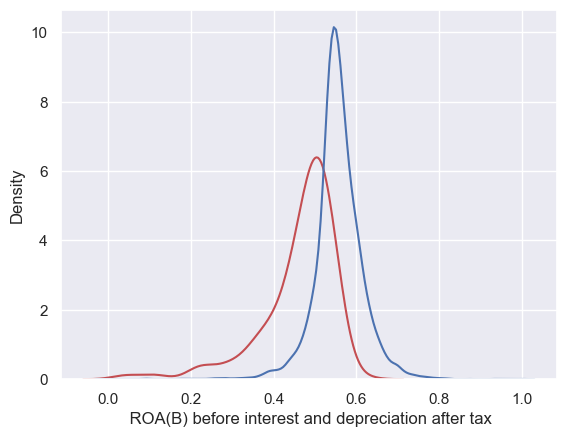

In [31]:
sns.distplot(df[df['Bankrupt']==1][' ROA(B) before interest and depreciation after tax'],hist=False,color='r')
sns.distplot(df[df['Bankrupt']==0][' ROA(B) before interest and depreciation after tax'],hist=False)

similarly, when ' ROA(B) before interest and % after tax' value for a firm
is below 25% of avg value with respect to others, we got 167 firms which were
classified as bankrupt which is 75.91% of total bankrupt firms and 1187 firms labeled as non-bankrupt(which is 17%).

In [32]:
roa_bn = df[(df[' ROA(B) before interest and depreciation after tax'] <0.52) & (df['Bankrupt'] == 0)]
roa_bn.shape

(1187, 95)

<Axes: xlabel=' Net Value Per Share (C)', ylabel='Density'>

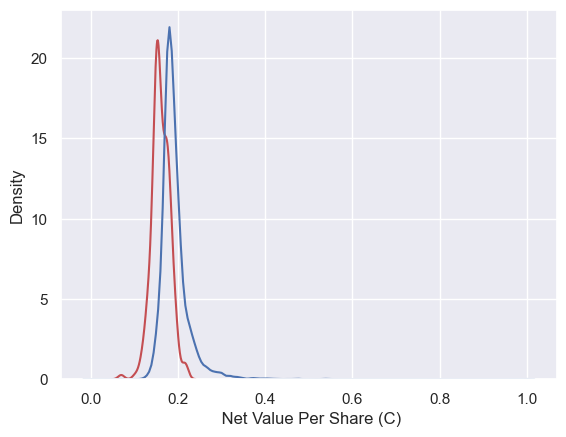

In [33]:
sns.distplot(df[df['Bankrupt']==1][' Net Value Per Share (C)'],hist=False,color='r')
sns.distplot(df[df['Bankrupt']==0][' Net Value Per Share (C)'],hist=False)

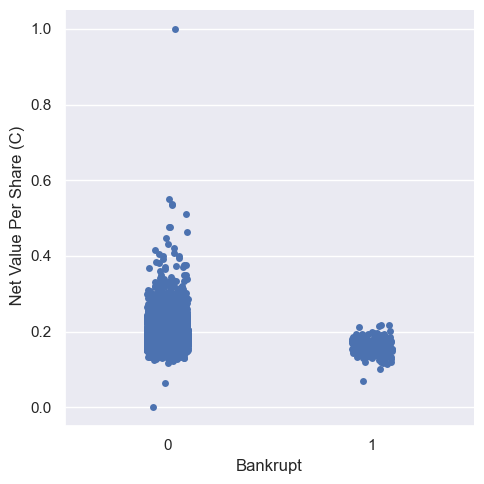

In [34]:
sns.catplot(y = df[' Net Value Per Share (C)'],x = df['Bankrupt'] ,data = df)
plt.show()

In [35]:
df[' Net Value Per Share (C)'].describe()

count    6819.000000
mean        0.190672
std         0.033480
min         0.000000
25%         0.173676
50%         0.184400
75%         0.199612
max         1.000000
Name:  Net Value Per Share (C), dtype: float64

In [36]:
share_c = df[(df[' Net Value Per Share (C)'] <0.18) & (df['Bankrupt'] == 1)]
share_c.shape

(184, 95)

In [37]:
share_c = df[(df[' Net Value Per Share (C)'] <0.18) & (df['Bankrupt'] == 0)]
share_c.shape

(2540, 95)

<Axes: xlabel=' Persistent EPS in the Last Four Seasons', ylabel='Density'>

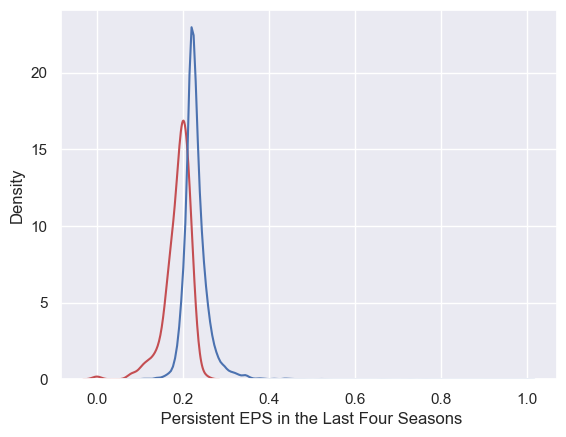

In [39]:
sns.distplot(df[df['Bankrupt']==1][' Persistent EPS in the Last Four Seasons'],hist=False,color='r')
sns.distplot(df[df['Bankrupt']==0][' Persistent EPS in the Last Four Seasons'],hist=False)

In [40]:
df[' Persistent EPS in the Last Four Seasons'].describe()

count    6819.000000
mean        0.228813
std         0.033263
min         0.000000
25%         0.214711
50%         0.224544
75%         0.238820
max         1.000000
Name:  Persistent EPS in the Last Four Seasons, dtype: float64

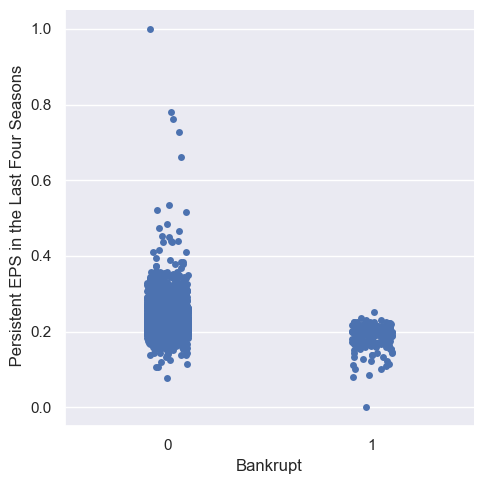

In [41]:
sns.catplot(y = df[' Persistent EPS in the Last Four Seasons'],x = df['Bankrupt'] ,data = df)
plt.show()

In [42]:
eps = df[(df[' Persistent EPS in the Last Four Seasons'] <0.21) & (df['Bankrupt'] == 1)]
eps.shape

(170, 95)

In [43]:
epsn = df[(df[' Persistent EPS in the Last Four Seasons'] <0.21) & (df['Bankrupt'] == 0)]
epsn.shape

(1089, 95)

When ' Persistent EPS in the Last Four Seasons' value for a firm
is below 25% of avg value with respect to others, we got 170 firms which were
classified as bankrupt which is 77.27% of total bankrupt banks and 1089 firms labeled as non-bankrupt(which is 16%).

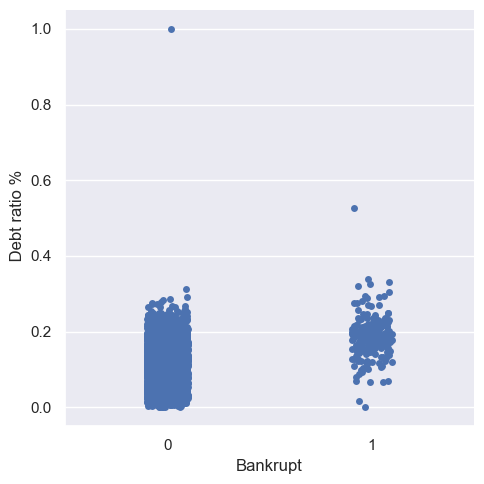

In [44]:
sns.catplot(y = df[' Debt ratio %'],x = df['Bankrupt'] ,data = df)
plt.show()

<Axes: xlabel=' Debt ratio %', ylabel='Density'>

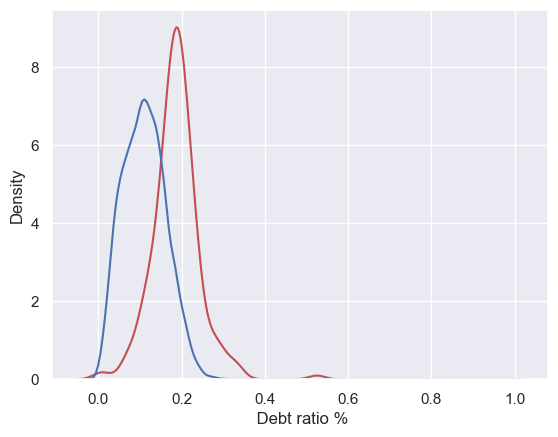

In [45]:
sns.distplot(df[df['Bankrupt']==1][' Debt ratio %'],hist=False,color='r')
sns.distplot(df[df['Bankrupt']==0][' Debt ratio %'],hist=False)

In [46]:
df[' Debt ratio %'].describe()

count    6819.000000
mean        0.113177
std         0.053920
min         0.000000
25%         0.072891
50%         0.111407
75%         0.148804
max         1.000000
Name:  Debt ratio %, dtype: float64

In [47]:
debtr = df[(df[' Debt ratio %'] >0.15) & (df['Bankrupt'] == 1)]
debtr.shape

(177, 95)

In [48]:
debtrn = df[(df[' Debt ratio %'] >0.15) & (df['Bankrupt'] == 0)]
debtrn.shape

(1491, 95)

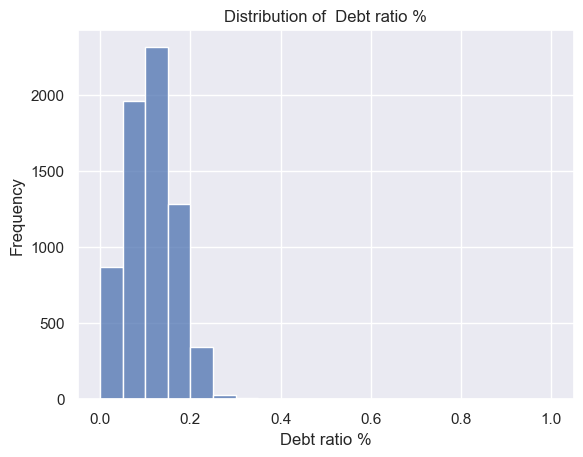

In [49]:
sns.histplot(df[' Debt ratio %'], bins=20)
plt.title('Distribution of  Debt ratio %')
plt.xlabel('Debt ratio %')
plt.ylabel('Frequency')
plt.show()

The insight obtained from the given information is that a significant proportion of bankrupt firms(177 out of 220 = 80.45%) have a debt ratio% of 0.15 or higher, while a smaller proportion of non-bankrupt firms also have a debt ratio of 0.15 or higher. out of the total of 220 bankrupt firms, 177 of them have a debt ratio of 0.15 or higher, indicating a higher likelihood of bankruptcy for firms with higher debt ratios. On the other hand, out of the total of 6600 non-bankrupt firms, 1491 of them have a debt ratio of 0.15 or higher, suggesting that a smaller proportion of non-bankrupt firms also have higher debt ratios.

In [50]:
df[' Net worth/Assets'].describe()

count    6819.000000
mean        0.886823
std         0.053920
min         0.000000
25%         0.851196
50%         0.888593
75%         0.927109
max         1.000000
Name:  Net worth/Assets, dtype: float64

<Axes: xlabel=' Net worth/Assets', ylabel='Density'>

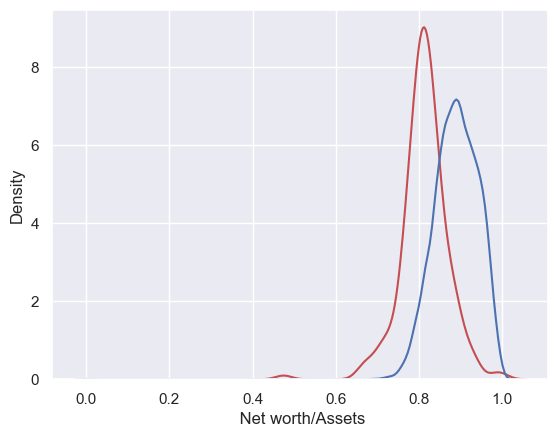

In [51]:
sns.distplot(df[df['Bankrupt']==1][' Net worth/Assets'],hist=False,color='r')
sns.distplot(df[df['Bankrupt']==0][' Net worth/Assets'],hist=False)

In [52]:
neta = df[(df[' Net worth/Assets'] <0.84) & (df['Bankrupt'] == 1)]
neta.shape

(164, 95)

In [53]:
netan = df[(df[' Net worth/Assets'] <0.84) & (df['Bankrupt'] == 0)]
netan.shape

(1128, 95)

<Axes: xlabel=' Net worth/Assets', ylabel='Count'>

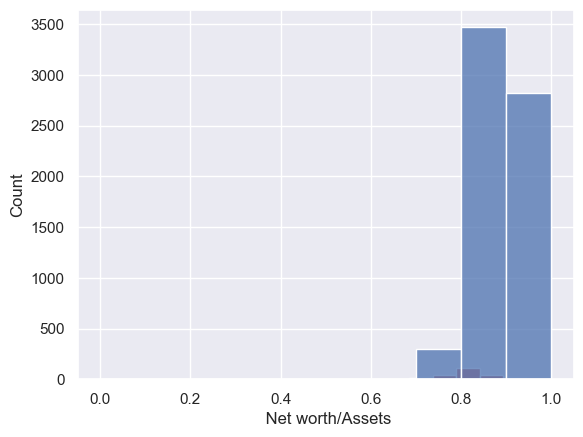

In [54]:
sns.histplot(df[df['Bankrupt']==1][' Net worth/Assets'],bins=10,color='r')
sns.histplot(df[df['Bankrupt']==0][' Net worth/Assets'],bins=10,color='b')

' Net worth/Assets' <0.84 -> 74% bankrupt and 17% non bankrupt banks.

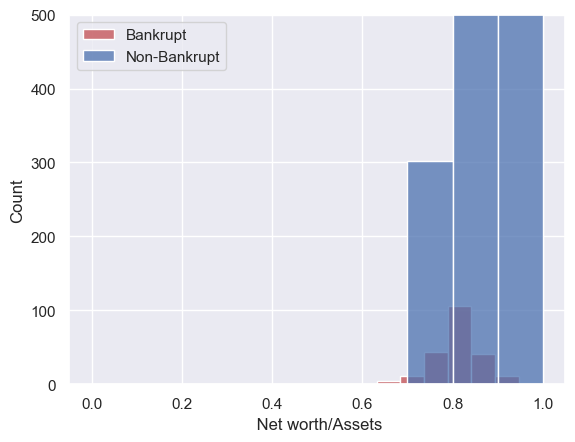

In [55]:
sns.histplot(df[df['Bankrupt']==1][' Net worth/Assets'], bins=10, color='r', label='Bankrupt')
sns.histplot(df[df['Bankrupt']==0][' Net worth/Assets'], bins=10, color='b', label='Non-Bankrupt')
plt.ylim(0, 500)  # Adjust the y-axis limits as needed
plt.legend()
plt.show()

In [56]:
df[' Net Income to Total Assets'].describe()

count    6819.000000
mean        0.807760
std         0.040332
min         0.000000
25%         0.796750
50%         0.810619
75%         0.826455
max         1.000000
Name:  Net Income to Total Assets, dtype: float64

<Axes: xlabel=' Net Income to Total Assets', ylabel='Density'>

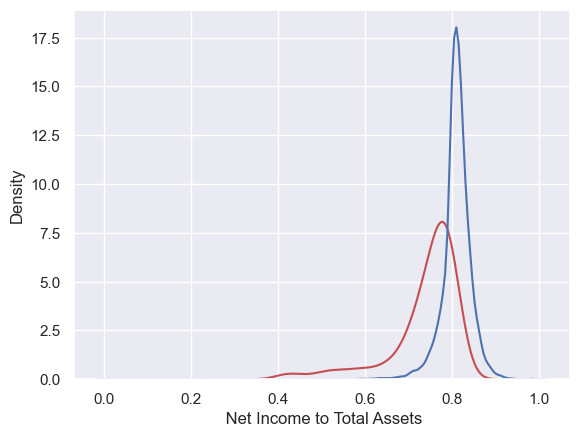

In [57]:
sns.distplot(df[df['Bankrupt']==1][' Net Income to Total Assets'],hist=False,color='r')
sns.distplot(df[df['Bankrupt']==0][' Net Income to Total Assets'],hist=False)

In [58]:
netx = df[(df[' Net Income to Total Assets'] <0.79) & (df['Bankrupt'] == 1)]
netx.shape

(166, 95)

In [59]:
netxn = df[(df[' Net Income to Total Assets'] <0.79) & (df['Bankrupt'] == 0)]
netxn.shape

(1153, 95)

' Net Income to Total Assets' <0.79 (below 25%) -> 75.45%

In [ ]:
# #pairplot-
# sns.pairplot(df)

In [ ]:
# g = sns.pairplot(df, hue=df['Bankrupt'], palette="husl")

In [ ]:
# sns.pairplot(df, hue=df['Bankrupt'], markers=["o", "s"])

In [ ]:
#outlier treatment-

In [61]:
# cols = [' ROA(C) before interest and depreciation before interest',
#        ' ROA(A) before interest and % after tax',
#        ' ROA(B) before interest and depreciation after tax',
#        ' Operating Gross Margin', ' Realized Sales Gross Margin',
#        ' Operating Profit Rate', ' Pre-tax net Interest Rate',
#        ' After-tax net Interest Rate',
#        ' Non-industry income and expenditure/revenue',
#        ' Continuous interest rate (after tax)',
#        ' Research and development expense rate', ' Cash flow rate',
#        ' Interest-bearing debt interest rate', ' Tax rate (A)',
#        ' Net Value Per Share (B)', ' Net Value Per Share (A)',
#        ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
#        ' Cash Flow Per Share', ' Revenue Per Share (Yuan �',
#        ' Operating Profit Per Share (Yuan �',
#        ' Per Share Net profit before tax (Yuan �',
#        ' Realized Sales Gross Profit Growth Rate',
#        ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
#        ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate',
#        ' Total Asset Growth Rate', ' Net Value Growth Rate',
#        ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %',
#        ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
#        ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
#        ' Long-term fund suitability ratio (A)', ' Borrowing dependency',
#        ' Contingent liabilities/Net worth',
#        ' Operating profit/Paid-in capital',
#        ' Net profit before tax/Paid-in capital',
#        ' Inventory and accounts receivable/Net value', ' Total Asset Turnover',
#        ' Accounts Receivable Turnover', ' Average Collection Days',
#         ' Fixed Assets Turnover Frequency',
#        ' Net Worth Turnover Rate (times)', ' Revenue per person',
#        ' Operating profit per person', ' Allocation rate per person',
#        ' Working Capital to Total Assets', ' Quick Assets/Total Assets',
#         ' Cash/Total Assets',
#        ' Quick Assets/Current Liability', ' Cash/Current Liability',
#        ' Current Liability to Assets', ' Operating Funds to Liability',
#        ' Inventory/Working Capital', ' Inventory/Current Liability',
#        ' Current Liabilities/Liability', ' Working Capital/Equity',
#        ' Current Liabilities/Equity', ' Long-term Liability to Current Assets',
#        ' Retained Earnings to Total Assets', ' Total income/Total expense',
#        ' Total expense/Assets', ' Current Asset Turnover Rate',
#         ' Working capitcal Turnover Rate',
#         ' Cash Flow to Sales', 
#        ' Current Liability to Liability', ' Current Liability to Equity',
#        ' Equity to Long-term Liability', ' Cash Flow to Total Assets',
#        ' Cash Flow to Liability', ' CFO to Assets', ' Cash Flow to Equity',
#        ' Current Liability to Current Assets', 
#        ' Net Income to Total Assets', ' Total assets to GNP price',
#        ' No-credit Interval', ' Gross Profit to Sales',
#        " Net Income to Stockholder's Equity", ' Liability to Equity',
#        ' Degree of Financial Leverage (DFL)',
#        ' Interest Coverage Ratio (Interest expense to EBIT)',
#        ' Equity to Liability']
# for i in cols:
#     sns.boxplot(x = df[i],data =df)
    
#     plt.show()

In [62]:
# capping outliers-
for i in  cols:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    df.loc[(df[i]>upper_limit), i] = upper_limit
    df.loc[(df[i]<lower_limit), i] = lower_limit
    

In [63]:
# for i in cols:
#     sns.boxplot(x = df[i],data =df)
    
#     plt.show()

In [64]:
df.describe()

ROA(C) before interest and depreciation before interest  \
count                                        6819.000000          
mean                                            0.505667          
std                                             0.051483          
min                                             0.387973          
25%                                             0.476527          
50%                                             0.502706          
75%                                             0.535563          
max                                             0.624116          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.560507   
std                                   0.050087   
min                                   0.455122   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   0.669579   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.554691    
std                                             0.050277    
min                                             0.442034    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             0.669348    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607834                      0.607812   
std                   0.010758                      0.010725   
min                   0.580240                      0.580321   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   0.634118                      0.633954   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.999028                    0.797467   
std                  0.000120                    0.000189   
min                  0.998781                    0.797096   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  0.999282                    0.797868   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809378   
std                        0.000157   
min                        0.809075   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        0.809706   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303526   
std                                        0.000124   
min                                        0.303288   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        0.303764   

        Continuous interest rate (after tax)  ...  \
count                            6819.000000  ...   
mean                                0.781637  ...   
std                                 0.000166  ...   
min                                 0.781314  ...   
25%                                 0.781567  ...   
50%                                 0.781635  ...   
75%                                 0.781735  ...   
max 

In [65]:
df.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan �',
       ' Operating Profit Per Share (Yuan �',
       ' Per Share Net profit before tax (Yuan �',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', '

In [66]:
# checking skewness - 
from scipy.stats import skew
sk = [' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan �',
       ' Operating Profit Per Share (Yuan �',
       ' Per Share Net profit before tax (Yuan �',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %',
       ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Long-term fund suitability ratio (A)', ' Borrowing dependency',
       ' Contingent liabilities/Net worth',
       ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital',
       ' Inventory and accounts receivable/Net value', ' Total Asset Turnover',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',
       ' Net Worth Turnover Rate (times)', ' Revenue per person',
       ' Operating profit per person', ' Allocation rate per person',
       ' Working Capital to Total Assets', ' Quick Assets/Total Assets',
       ' Current Assets/Total Assets', ' Cash/Total Assets',
       ' Quick Assets/Current Liability', ' Cash/Current Liability',
       ' Current Liability to Assets', ' Operating Funds to Liability',
       ' Inventory/Working Capital', ' Inventory/Current Liability',
       ' Current Liabilities/Liability', ' Working Capital/Equity',
       ' Current Liabilities/Equity', ' Long-term Liability to Current Assets',
       ' Retained Earnings to Total Assets', ' Total income/Total expense',
       ' Total expense/Assets', ' Current Asset Turnover Rate',
       ' Quick Asset Turnover Rate', ' Working capitcal Turnover Rate',
       ' Cash Turnover Rate', ' Cash Flow to Sales', ' Fixed Assets to Assets',
       ' Current Liability to Liability', ' Current Liability to Equity',
       ' Equity to Long-term Liability', ' Cash Flow to Total Assets',
       ' Cash Flow to Liability', ' CFO to Assets', ' Cash Flow to Equity',
       ' Current Liability to Current Assets', ' Liability-Assets Flag',
       ' Net Income to Total Assets', ' Total assets to GNP price',
       ' No-credit Interval', ' Gross Profit to Sales',
       " Net Income to Stockholder's Equity", ' Liability to Equity',
       ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Equity to Liability']
skewed = []
for i in sk:
    print(f'Feature: {i} ,Skewness: {skew(df[i])}')
    if skew(df[i]) >=0.75 or skew(df[i]) <=-0.75:
        a = [i,skew(df[i])]
        skewed.append(a)
    


Feature:  ROA(C) before interest and depreciation before interest ,Skewness: 0.07990332650408014
Feature:  ROA(A) before interest and % after tax ,Skewness: -0.031181979025839593
Feature:  ROA(B) before interest and depreciation after tax ,Skewness: 0.026503366241278692
Feature:  Operating Gross Margin ,Skewness: 0.5394518312516221
Feature:  Realized Sales Gross Margin ,Skewness: 0.5405345502562546
Feature:  Operating Profit Rate ,Skewness: 0.006659058525761403
Feature:  Pre-tax net Interest Rate ,Skewness: -0.08400819042239455
Feature:  After-tax net Interest Rate ,Skewness: -0.0876975209577079
Feature:  Non-industry income and expenditure/revenue ,Skewness: 0.005802848010884153
Feature:  Continuous interest rate (after tax) ,Skewness: -0.08236174341359519
Feature:  Operating Expense Rate ,Skewness: 1.2483986246061325
Feature:  Research and development expense rate ,Skewness: 1.2126320809371907
Feature:  Cash flow rate ,Skewness: 0.4568821244182636
Feature:  Interest-bearing debt inte

In [67]:
skewed

[[' Operating Expense Rate', 1.2483986246061325],
 [' Research and development expense rate', 1.2126320809371907],
 [' Interest-bearing debt interest rate', 0.7608826522723777],
 [' Tax rate (A)', 1.0094116996514482],
 [' Revenue Per Share (Yuan �', 1.0246632401215983],
 [' Total Asset Growth Rate', -0.7831815429142992],
 [' Current Ratio', 0.9976991193417963],
 [' Quick Ratio', 0.9739237253063611],
 [' Total debt/Total net worth', 0.9883709285844804],
 [' Long-term fund suitability ratio (A)', 1.148730796990913],
 [' Borrowing dependency', 1.0774622070195357],
 [' Contingent liabilities/Net worth', 1.2240370794490578],
 [' Inventory and accounts receivable/Net value', 0.9679574747991556],
 [' Total Asset Turnover', 0.8560430335214694],
 [' Accounts Receivable Turnover', 1.0318761208999356],
 [' Inventory Turnover Rate (times)', 1.1370384314645894],
 [' Fixed Assets Turnover Frequency', 1.1504393796021388],
 [' Net Worth Turnover Rate (times)', 0.9849069252760783],
 [' Revenue per pers

In [68]:
lst = []
for i in skewed:
    a = str(i[0])
    lst.append(a)
lst    
#     name = i[0]
#     print(name)

[' Operating Expense Rate',
 ' Research and development expense rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Revenue Per Share (Yuan �',
 ' Total Asset Growth Rate',
 ' Current Ratio',
 ' Quick Ratio',
 ' Total debt/Total net worth',
 ' Long-term fund suitability ratio (A)',
 ' Borrowing dependency',
 ' Contingent liabilities/Net worth',
 ' Inventory and accounts receivable/Net value',
 ' Total Asset Turnover',
 ' Accounts Receivable Turnover',
 ' Inventory Turnover Rate (times)',
 ' Fixed Assets Turnover Frequency',
 ' Net Worth Turnover Rate (times)',
 ' Revenue per person',
 ' Allocation rate per person',
 ' Cash/Total Assets',
 ' Quick Assets/Current Liability',
 ' Cash/Current Liability',
 ' Inventory/Current Liability',
 ' Current Liabilities/Liability',
 ' Current Liabilities/Equity',
 ' Long-term Liability to Current Assets',
 ' Total expense/Assets',
 ' Current Asset Turnover Rate',
 ' Quick Asset Turnover Rate',
 ' Cash Turnover Rate',
 ' Fixed Assets 

In [69]:
# 39 features are either right or left skewed.
len(lst)

39

In [165]:
# boxcox transformation failed due to negative values present in data and 
# best results are given by yeojohnson transformation-
# log transformation syntax - 
# for i in skewed:
#     df[i[0]] = np.log1p(df[i[0]])

In [70]:
from scipy.stats import yeojohnson
for i in lst:
    transformed_data, lambda_value = yeojohnson(df[i])
    df[i] = transformed_data
#     print("Lambda value: ", lambda_value)
    

In [71]:
#' Operating Expense Rate' -> 1.2483986246061325]
#' Research and development expense rate'-> 1.2126320809371907]
skew(df[' Operating Expense Rate'])

0.7019341516835439

### yeojohnson transformation technique is very similar to Box-cox transformation but does not require the values to be strictly positive.

from scipy.stats import yeojohnson
transformed_data, lambda_value = stats.yeojohnson(data)

#### Print the transformed data and lambda value -->
print("Original data: ", data)
print("Transformed data: ", transformed_data)
print("Lambda value: ", lambda_value)

In [72]:
# [' Liability-Assets Flag', 29.14405899270977] 
# importance = [' Liability-Assets Flag', 0.0]

In [73]:
df.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.387973          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.455122   
1                                 0.538214   
2                                 0.499019   
3                                 0.455122   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.442034    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.797096   
1                0.998946                    0.797380   
2                0.998857                    0.797096   
3                0.998781                    0.797096   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.809075                                      0.303288   
1                      0.809301                                      0.303556   
2                      0.809075                                      0.303288   
3                      0.809075                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)  ...   Net Income to Total Assets  \
0                               0.781314  ...                     0.752193   
1                               0.781506  ...                     0.795297   
2                               0.781314  ...                     0.774670   
3                               0.781314  ...                     0.752193   
4                               0.781550  ...                     0.795016   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                    0.003961             0.622879                0.601453   
1                    0.003829             0.623652                0.610237   
2                    0.004227             0.623841                0.601449   
3                    0.002326             0.622929                0.583538   
4                    0.002612             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.836752              0.007689   
1                             0.839969              0.007689   
2                             0.836774              0.007689   
3                             0.836752              0.007689   
4                             0.839973              0.007689   

    Degree of Financial Leverage (DFL)  \
0                             0.026608   
1                             0.027096   
2                             0.026608   
3                             0.026697   
4                             0.026608   

    Interest Coverage Ratio (Interest expense to EBIT)   Equity to Liability  \
0                                           0.564309                0.013224   
1                                           0.566574                0.015812  

In [74]:
# droping ' Liability-Assets Flag' feature as from both  feature importance 
# and skewness test it comes out to be irrelevent-
df = df.drop([' Liability-Assets Flag'],axis=1)
df.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.387973          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.455122   
1                                 0.538214   
2                                 0.499019   
3                                 0.455122   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.442034    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.797096   
1                0.998946                    0.797380   
2                0.998857                    0.797096   
3                0.998781                    0.797096   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.809075                                      0.303288   
1                      0.809301                                      0.303556   
2                      0.809075                                      0.303288   
3                      0.809075                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)  ...   Net Income to Total Assets  \
0                               0.781314  ...                     0.752193   
1                               0.781506  ...                     0.795297   
2                               0.781314  ...                     0.774670   
3                               0.781314  ...                     0.752193   
4                               0.781550  ...                     0.795016   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                    0.003961             0.622879                0.601453   
1                    0.003829             0.623652                0.610237   
2                    0.004227             0.623841                0.601449   
3                    0.002326             0.622929                0.583538   
4                    0.002612             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.836752              0.007689   
1                             0.839969              0.007689   
2                             0.836774              0.007689   
3                             0.836752              0.007689   
4                             0.839973              0.007689   

    Degree of Financial Leverage (DFL)  \
0                             0.026608   
1                             0.027096   
2                             0.026608   
3                             0.026697   
4                             0.026608   

    Interest Coverage Ratio (Interest expense to EBIT)   Equity to Liability  \
0                                           0.564309                0.013224   
1                                           0.566574                0.015812  

In [75]:
# tx = np.sqrt(tx)
skew(df[' Operating Expense Rate'])

0.7019341516835439

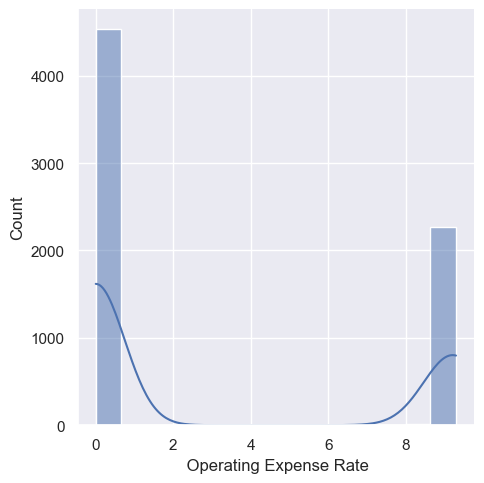

In [76]:
#checking -
sns.displot(df[' Operating Expense Rate'],kde = True)
#' Operating Expense Rate', ' Inventory Turnover Rate (times)', ' Cash Turnover Rate'
plt.show()

In [77]:
# correlation check-
cor_mat = df.corr()
print(cor_mat)

                                                     ROA(C) before interest and depreciation before interest  \
 ROA(C) before interest and depreciation before...                                           1.000000          
 ROA(A) before interest and % after tax                                                      0.941564          
 ROA(B) before interest and depreciation after tax                                           0.988614          
 Operating Gross Margin                                                                      0.471126          
 Realized Sales Gross Margin                                                                 0.468962          
...                                                                                               ...          
 Liability to Equity                                                                        -0.254730          
 Degree of Financial Leverage (DFL)                                                          0.111443   

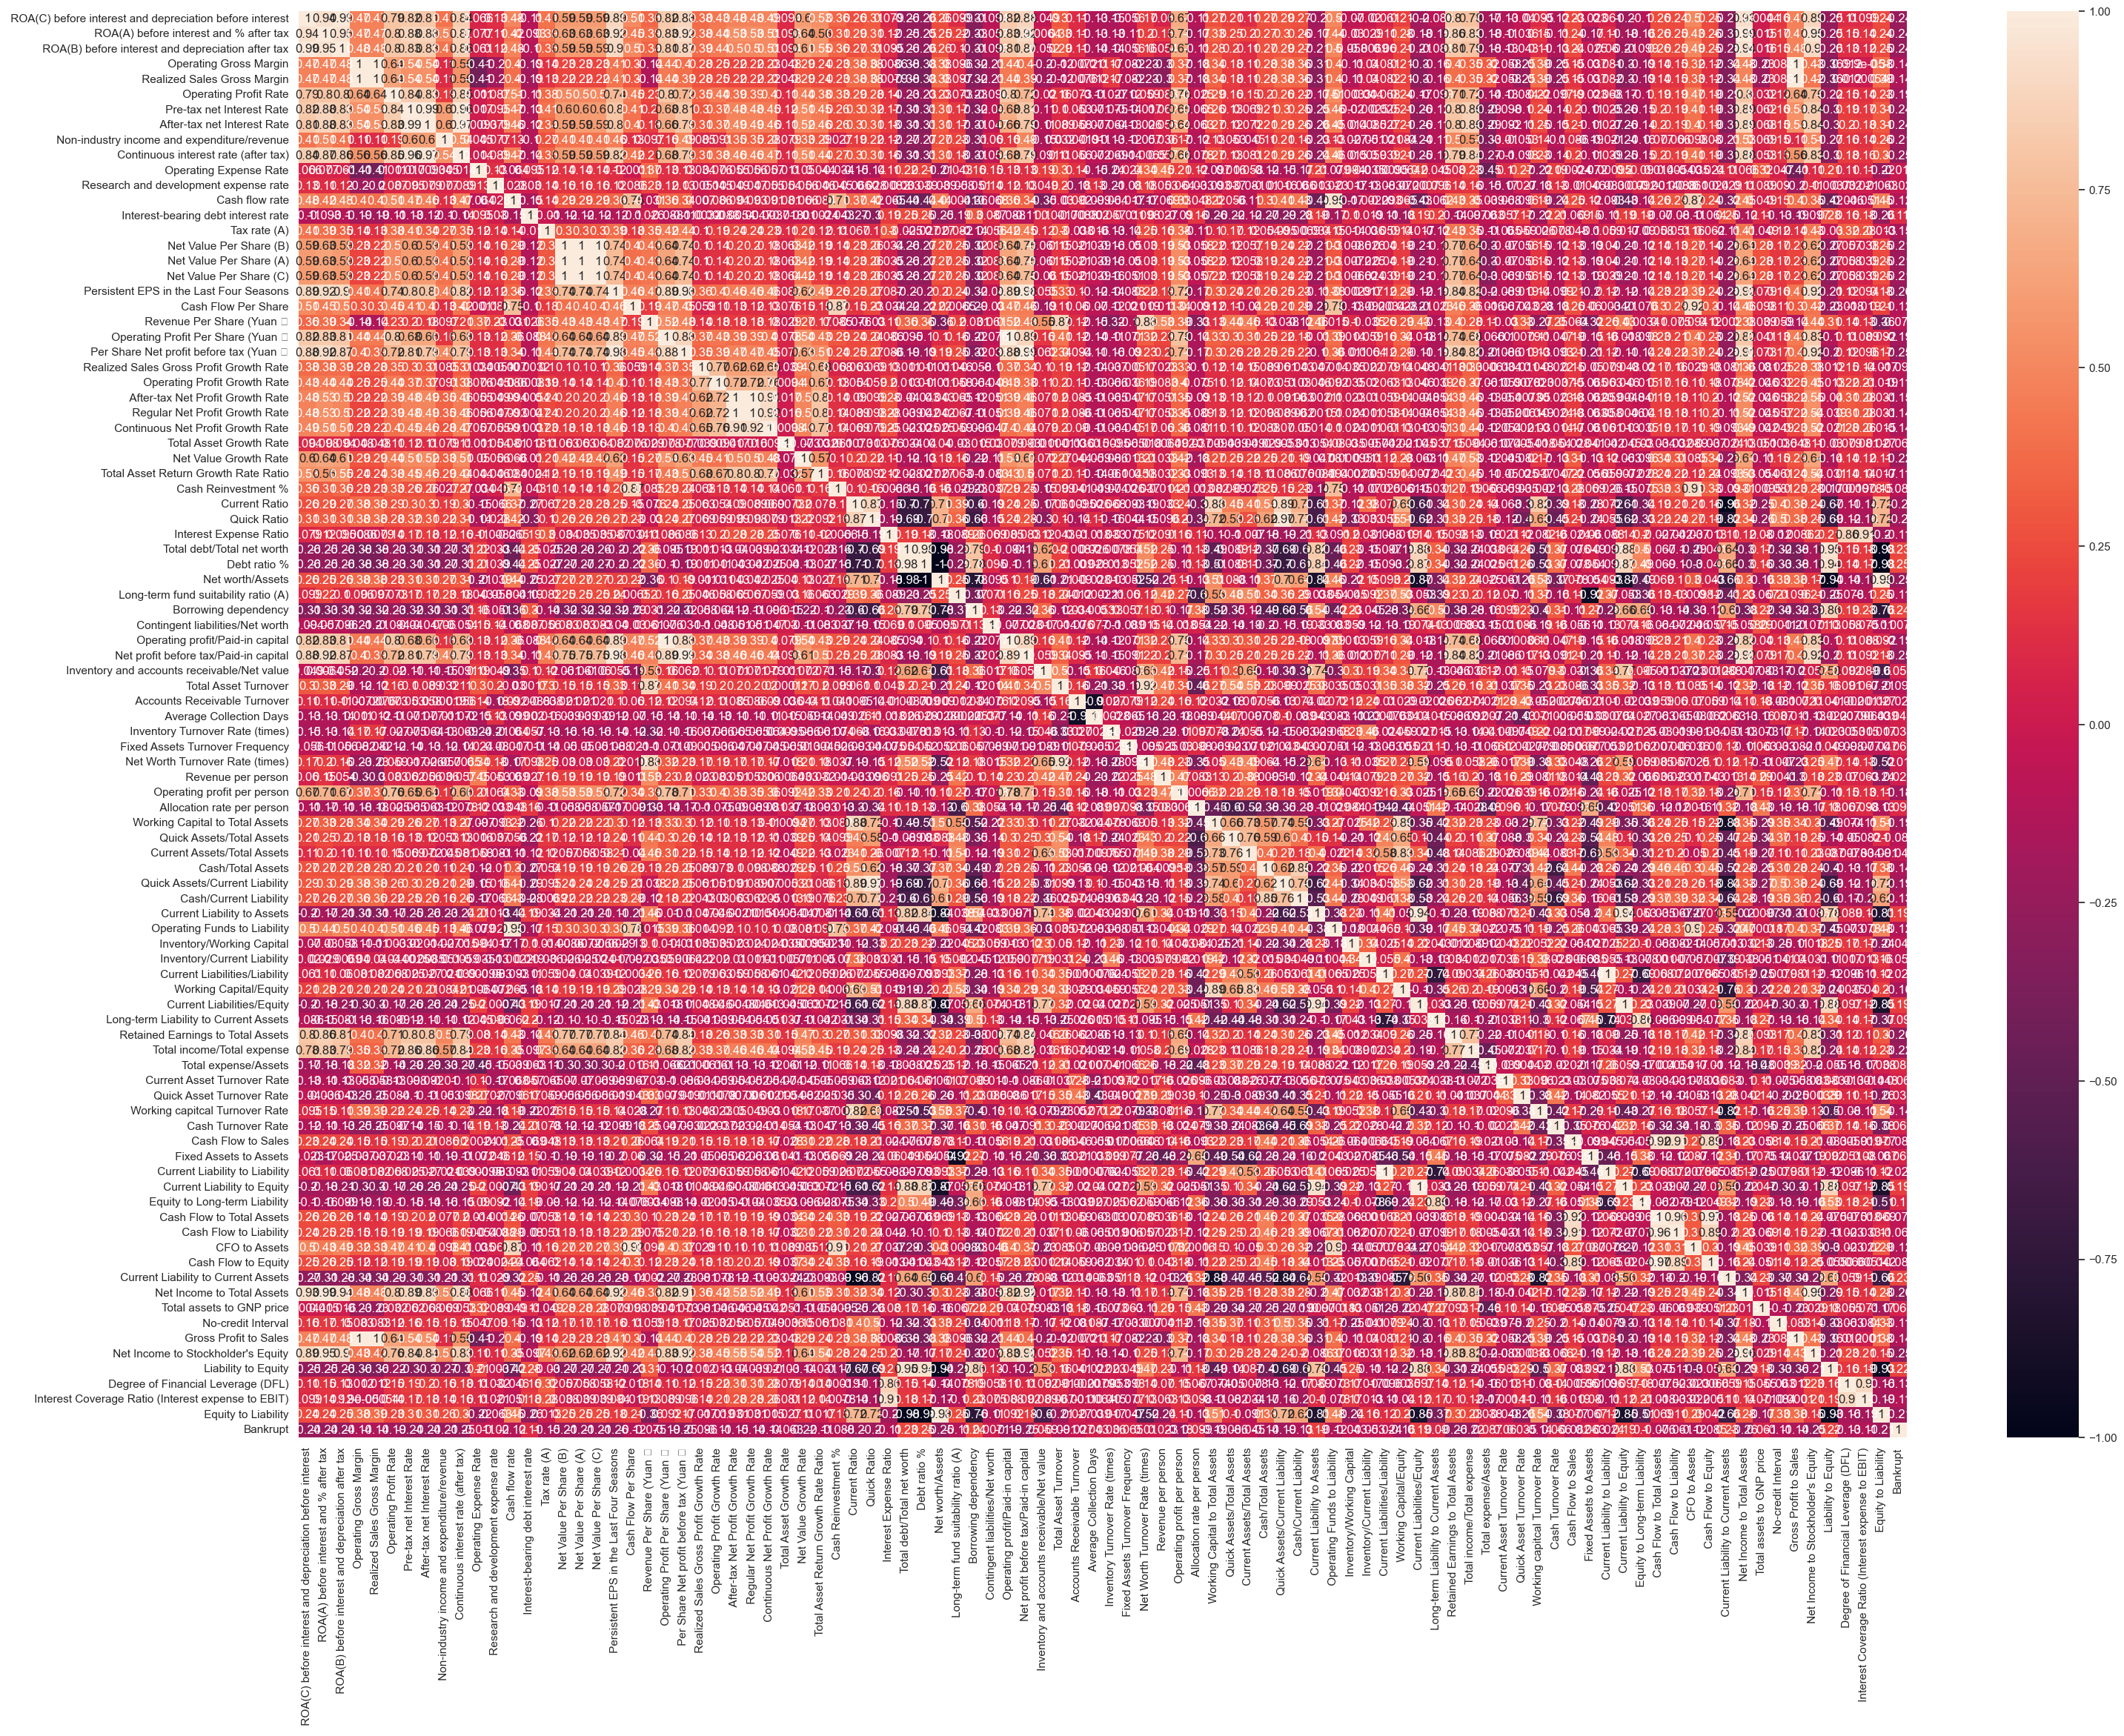

In [78]:
plt.figure(figsize = (35, 25))
sns.heatmap(df.corr(), annot = True, cmap = sns.color_palette('rocket', as_cmap=True))
plt.show()

In [ ]:
#correlation - 

In [79]:
def correlation(df,threshold=0.75):
# Compute correlation matrix
    corr_matrix = df.corr()

    # Get pairs of highly correlated variables
    correlated_vars = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_vars.add(colname)
    return(correlated_vars)
    

In [80]:
correlated_vars = correlation(df)

In [81]:
correlated_vars

{' After-tax net Interest Rate',
 ' Average Collection Days',
 ' Borrowing dependency',
 ' CFO to Assets',
 ' Cash Flow Per Share',
 ' Cash Flow to Equity',
 ' Cash Flow to Liability',
 ' Cash Flow to Total Assets',
 ' Cash Reinvestment %',
 ' Cash/Current Liability',
 ' Continuous Net Profit Growth Rate',
 ' Continuous interest rate (after tax)',
 ' Current Assets/Total Assets',
 ' Current Liabilities/Equity',
 ' Current Liability to Assets',
 ' Current Liability to Current Assets',
 ' Current Liability to Equity',
 ' Current Liability to Liability',
 ' Debt ratio %',
 ' Degree of Financial Leverage (DFL)',
 ' Equity to Liability',
 ' Equity to Long-term Liability',
 ' Fixed Assets to Assets',
 ' Gross Profit to Sales',
 ' Interest Coverage Ratio (Interest expense to EBIT)',
 ' Liability to Equity',
 " Net Income to Stockholder's Equity",
 ' Net Income to Total Assets',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Net Worth Turnover Rate (times)',
 ' Net profit before 

In [28]:
len(correlated_vars)

55

In [29]:
# correlation with target variable - all low correlation with target
tar_corr = df.corrwith(df["Bankrupt"])
tar_corr

 ROA(C) before interest and depreciation before interest   -0.239543
 ROA(A) before interest and % after tax                    -0.239500
 ROA(B) before interest and depreciation after tax         -0.241993
 Operating Gross Margin                                    -0.140042
 Realized Sales Gross Margin                               -0.139272
                                                              ...   
 Liability to Equity                                        0.207433
 Degree of Financial Leverage (DFL)                        -0.129292
 Interest Coverage Ratio (Interest expense to EBIT)        -0.110761
 Equity to Liability                                       -0.213583
Bankrupt                                                    1.000000
Length: 94, dtype: float64

In [30]:
good_corr_wt = []
for i in tar_corr:
    if i >=0.7:
        good_corr_wt.append(i)
good_corr_wt

[1.0]

In [32]:
# drop correlated variables - 
# df = df.drop(correlated_vars,axis=1)
# df.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.387973          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    Operating Gross Margin   Non-industry income and expenditure/revenue  \
0                 0.601457                                      0.303288   
1                 0.610235                                      0.303556   
2                 0.601450                                      0.303288   
3                 0.583541                                      0.303350   
4                 0.598783                                      0.303475   

    Operating Expense Rate   Research and development expense rate  \
0                 0.000126                                0.000000   
1                 0.000290                                0.000000   
2                 0.000236                               25.841231   
3                 0.000108                                0.000000   
4                 9.265161                                0.000000   

    Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)  \
0         0.458143                              0.000487           -0.0   
1         0.461867                              0.000452           -0.0   
2         0.458521                              0.000513           -0.0   
3         0.465705                              0.000348           -0.0   
4         0.462746                              0.000470           -0.0   

    Net Value Per Share (B)   Revenue Per Share (Yuan �  ...  \
0                  0.147950                    0.014539  ...   
1                  0.182251                    0.016875  ...   
2                  0.177911                    0.005567  ...   
3                  0.154187                    0.012298  ...   
4                  0.167502                    0.021759  ...   

    Current Liabilities/Liability   Long-term Liability to Current Assets  \
0                        1.871492                                0.007588   
1                        0.501780                                0.007588   
2                        0.890605                                0.002976   
3                        1.567784                                0.007566   
4                        3.987632                               -0.000000   

    Total expense/Assets   Current Asset Turnover Rate  \
0               0.029381                      0.000275   
1               0.018020                      0.000089   
2               0.015925                      0.000275   
3               0.017359                      0.000275   
4               0.018431                      0.000275   

    Quick Asset Turnover Rate   Cash Turnover Rate   Cash Flow to Sales  \
0                    9.976170            39.709197             0.671568   
1                    9.999252            45.938080             0.671570   
2                    0.001022            41.508333             0.671571   
3                    9.964722            45.151186             0.671533   
4                    9.938381            41.795373             0.671563   

    Total assets to GNP price   No-credit Interval  Bankrupt  
0                    0.003961             0.622879         1  
1                    0.003829             0.623652         1  
2                    0.004227             0.623841         1  
3                    0.002326             0.622929         1  
4                    0.002612             0.623521         1  

[5 rows x 39 columns]

In [31]:
df.shape

(6819, 94)

In [82]:
# target class imbalance-
df['Bankrupt'].value_counts()/(len(df))*100

0    96.77372
1     3.22628
Name: Bankrupt, dtype: float64

In [83]:
# 0 class is 97% and 1 class is only 3%

Synthetic Minority Oversampling Technique or SMOTE is another technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

In [84]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [85]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_x, oversampled_y = sm.fit_resample(x,y)

In [86]:
# target col-
y.value_counts(),oversampled_y.value_counts()

(0    6599
 1     220
 Name: Bankrupt, dtype: int64,
 1    6599
 0    6599
 Name: Bankrupt, dtype: int64)

In [ ]:
#scaling of data - 

In [87]:
oversampled_x

ROA(C) before interest and depreciation before interest  \
0                                               0.387973          
1                                               0.464291          
2                                               0.426071          
3                                               0.399844          
4                                               0.465022          
...                                                  ...          
13193                                           0.467577          
13194                                           0.433590          
13195                                           0.387973          
13196                                           0.394737          
13197                                           0.387973          

        ROA(A) before interest and % after tax  \
0                                     0.455122   
1                                     0.538214   
2                                     0.499019   
3                                     0.455122   
4                                     0.538432   
...                                        ...   
13193                                 0.518909   
13194                                 0.486650   
13195                                 0.455122   
13196                                 0.460261   
13197                                 0.455122   

        ROA(B) before interest and depreciation after tax  \
0                                               0.442034    
1                                               0.516730    
2                                               0.472295    
3                                               0.457733    
4                                               0.522298    
...                                                  ...    
13193                                           0.519349    
13194                                           0.482261    
13195                                           0.442034    
13196                                           0.448804    
13197                                           0.442034    

        Operating Gross Margin   Realized Sales Gross Margin  \
0                     0.601457                      0.601457   
1                     0.610235                      0.610235   
2                     0.601450                      0.601364   
3                     0.583541                      0.583541   
4                     0.598783                      0.598783   
...                        ...                           ...   
13193                 0.597882                      0.597964   
13194                 0.604376                      0.604376   
13195                 0.581110                      0.581186   
13196                 0.593674                      0.593984   
13197                 0.603675                      0.603675   

        Operating Profit Rate   Pre-tax net Interest Rate  \
0                    0.998969                    0.797096   
1                    0.998946                    0.797380   
2                    0.998857                    0.797096   
3                    0.998781                    0.797096   
4                    0.998973                    0.797366   
...                       ...                         ...   
13193                0.998908                    0.797309   
13194                0.998903                    0.797098   
13195                0.998782                    0.797096   
13196                0.998864                    0.797112   
13197                0.998781                    0.797096   

        After-tax net Interest Rate  \
0                          0.809075   
1                          0.809301   
2                          0.809075   
3                          0.809075   
4                          0.809304   
...                             ...   
13193                      0.809236   
13194                      0.809076   
13195           

In [88]:
from sklearn.preprocessing import StandardScaler
for col in x:
    ss = StandardScaler()
    oversampled_x[col] = ss.fit_transform(oversampled_x[[col]])

In [89]:
oversampled_x

ROA(C) before interest and depreciation before interest  \
0                                              -1.517814          
1                                              -0.153479          
2                                              -0.836736          
3                                              -1.305603          
4                                              -0.140406          
...                                                  ...          
13193                                          -0.094739          
13194                                          -0.702324          
13195                                          -1.517814          
13196                                          -1.396910          
13197                                          -1.517814          

        ROA(A) before interest and % after tax  \
0                                    -1.359803   
1                                     0.174127   
2                                    -0.549439   
3                                    -1.359803   
4                                     0.178153   
...                                        ...   
13193                                -0.182262   
13194                                -0.777772   
13195                                -1.359803   
13196                                -1.264935   
13197                                -1.359803   

        ROA(B) before interest and depreciation after tax  \
0                                              -1.466147    
1                                              -0.104398    
2                                              -0.914469    
3                                              -1.179938    
4                                              -0.002895    
...                                                  ...    
13193                                          -0.056650    
13194                                          -0.732782    
13195                                          -1.466147    
13196                                          -1.342715    
13197                                          -1.466147    

        Operating Gross Margin   Realized Sales Gross Margin  \
0                    -0.203622                     -0.206029   
1                     0.624183                      0.625713   
2                    -0.204302                     -0.214906   
3                    -1.893214                     -1.903656   
4                    -0.455769                     -0.459375   
...                        ...                           ...   
13193                -0.540820                     -0.537019   
13194                 0.071631                      0.070533   
13195                -2.122523                     -2.126770   
13196                -0.937632                     -0.914125   
13197                 0.005571                      0.004159   

        Operating Profit Rate   Pre-tax net Interest Rate  \
0                    0.033100                   -1.246483   
1                   -0.152656                    0.155450   
2                   -0.861488                   -1.246483   
3                   -1.470276                   -1.246483   
4                    0.064525                    0.085750   
...                       ...                         ...   
13193               -0.454271                   -0.196243   
13194               -0.498403                   -1.238474   
13195               -1.460764                   -1.246483   
13196               -0.812181                   -1.169499   
13197               -1.470276                   -1.246483   

        After-tax net Interest Rate  \
0                         -1.197586   
1                          0.132818   
2                         -1.197586   
3                         -1.197586   
4                          0.150471   
...                             ...   
13193                     -0.247717   
13194                     -1.189974   
13195           

As we seen thre are 55 highly correlated features in our data as highly correlated features can lead to multicollinearity issues, which can affect the performance of the model and make it difficult to interpret the importance of individual features. but , dropping them straight may not be a good idea .

we can use methods like correlation analysis or dimensionality reduction techniques like PCA to identify the most important features in your dataset. Correlation analysis can help identify the pairs of highly correlated features, while PCA can help identify the principal components that capture the most variance in your dataset. 

### pca -

In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
X_pca = pca.fit_transform(oversampled_x)

Ultimately, the goal of using principal component analysis is to reduce the dimensionality of the data while retaining as much information as possible.

In [91]:
# pca = PCA(0.75)
# X_PCA = pca.fit_transform(oversampled_x)
# print(X_PCA.shape)

In [92]:
# Check proportion of variance explained
var_exp = pca.explained_variance_ratio_
print(f'Proportion of variance explained by each component: {var_exp}')
print(f'Total proportion of variance explained: {sum(var_exp)}')

Proportion of variance explained by each component: [0.34283904 0.09752646 0.07760035 0.0494963  0.0389058  0.03584307
 0.03406846 0.0303456  0.02564834 0.02251516 0.02081542 0.01709631]
Total proportion of variance explained: 0.792700307795951


In [56]:
X_pca

array([[-8.04060841e+00, -2.64258961e+00, -6.56767475e-01, ...,
        -2.56361574e+00,  8.08286422e-01,  1.76028783e+00],
       [-4.35330036e-01, -4.29639174e+00, -2.88390089e+00, ...,
        -7.15684102e-03,  1.74603978e-01, -8.03905809e-01],
       [-3.34676013e+00,  1.04667960e+00, -2.20158568e+00, ...,
        -2.27486735e+00, -2.90534402e+00,  2.41746758e+00],
       ...,
       [-6.63839243e+00,  2.21620058e+00, -4.10179198e+00, ...,
        -6.71166401e-01, -3.27889400e+00,  4.65227775e-01],
       [-4.65807746e+00,  5.11441469e+00, -2.26692464e+00, ...,
        -7.40788874e-01,  1.34294630e-01,  1.73574817e+00],
       [-5.25235088e+00,  6.76787174e+00,  1.75487287e+00, ...,
        -4.46288894e-01,  4.72150069e-01, -2.96053949e-01]])

In [93]:
X_pca.shape

(13198, 12)

In [94]:
#train_test_split - 
from sklearn.model_selection import train_test_split,GridSearchCV,KFold, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(X_pca, oversampled_y,test_size = 0.3,random_state=101)

In [ ]:
#using 2 Algorithms 
#1) XGboost Classifier
#2) logistic Regression Classifier

In [95]:
#1) XGboost Classifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [96]:
modelx = XGBClassifier()

In [97]:
kfold = KFold(10)
result = cross_val_score(modelx,x_train,y_train,cv=kfold) 
print(result)
print(f'Accuracy:  {np.mean(result):.3f}')

[0.96536797 0.97943723 0.96753247 0.97077922 0.97619048 0.96645022
 0.96969697 0.96645022 0.95666306 0.96424702]
Accuracy:  0.968


In [98]:
modelx.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [99]:
y_pred_train =modelx.predict(x_train)
pred_y = modelx.predict(x_test)

In [100]:
y_test[y_test==0]

4746    0
1071    0
146     0
1723    0
3739    0
       ..
6019    0
768     0
6283    0
6621    0
6710    0
Name: Bankrupt, Length: 1965, dtype: int64

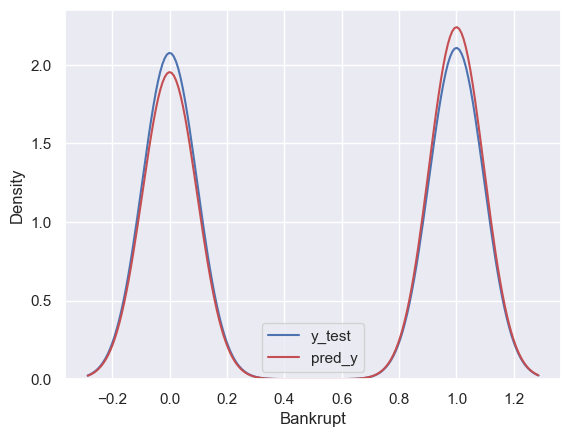

In [101]:
sns.distplot(y_test,label='y_test',hist=False)
sns.distplot(pred_y,label='pred_y',hist=False,color='r')
plt.legend()
plt.show()

In [102]:
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
print("*****************************************************")
print("Test Accuracy", accuracy_score(y_test, pred_y))

Train Accuracy 1.0
*****************************************************
Test Accuracy 0.9641414141414142


In [103]:
#classification report-
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1965
           1       0.94      0.99      0.97      1995

    accuracy                           0.96      3960
   macro avg       0.97      0.96      0.96      3960
weighted avg       0.97      0.96      0.96      3960



In [104]:
#AUC_ROC curve-
from sklearn.metrics import roc_auc_score
xgb_roc_auc = roc_auc_score(y_test, pred_y)
xgb_roc_auc

0.9639097744360902

In [105]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_y)

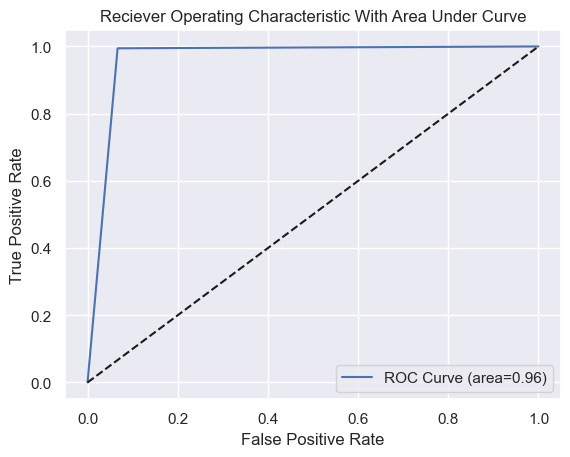

In [106]:
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (area=%0.2f)" % xgb_roc_auc)
plt.plot([0,1],[0,1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciever Operating Characteristic With Area Under Curve")
plt.legend(loc='lower right')
plt.show()

In [69]:
# # GridSearchCV for Hyperparametertunning-
# import time
# start = time.time()
# param_dist = {'gamma': [0,0.1,0.5,1,5,10,25,50,100],
#               'learning_rate': [0.01,0.03,0.05,0.1,0.2,0.5],
#               #'max_depth': [5,6,8,10,12,14],
#               'n_estimators': [50,80,100,130,150,200],
#               'booster': ['gbtree','gblinear']
#              }

# cv_xg = GridSearchCV(modelx, cv = 10, 
#                      param_grid=param_dist, 
#                      n_jobs = 3)

In [70]:
# cv_xg.fit(x_train, y_train)
# print('Best Parameters using grid search: \n', cv_xg.best_params_)
# end = time.time()
# print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.5, 'n_estimators': 150}
Time taken in grid search:  1236.85


In [ ]:
# modelx.set_params('booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.5, 'n_estimators': 150)

In [107]:
#2) logistic Regression Classifier-
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [108]:
kfold = KFold(10)
result = cross_val_score(logit,x_train,y_train,cv=kfold) 
print(result)
print(f'Accuracy:  {np.mean(result):.3f}')

[0.87987013 0.89177489 0.88095238 0.88744589 0.87770563 0.89285714
 0.87121212 0.89393939 0.86348862 0.88190683]
Accuracy:  0.882


In [109]:
logit.fit(x_train, y_train)

LogisticRegression()

In [110]:
yl_pred_train =logit.predict(x_train)
pred_yl = logit.predict(x_test)

In [111]:
print("Train Accuracy", accuracy_score(y_train, yl_pred_train))
print("*****************************************************")
print("Test Accuracy", accuracy_score(y_test, pred_yl))

Train Accuracy 0.8831998268023382
*****************************************************
Test Accuracy 0.8845959595959596


In [113]:
print(classification_report(y_test, pred_yl))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1965
           1       0.87      0.91      0.89      1995

    accuracy                           0.88      3960
   macro avg       0.89      0.88      0.88      3960
weighted avg       0.89      0.88      0.88      3960



In [114]:
# roc_auc curve-
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_test, pred_yl)
logit_roc_auc

0.8844114102049017

In [115]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_yl)

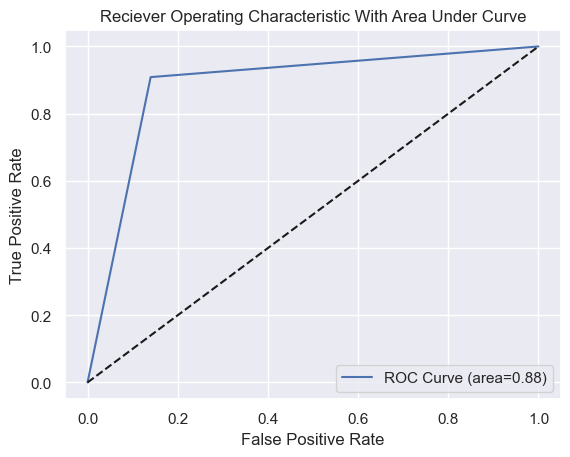

In [116]:
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (area=%0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciever Operating Characteristic With Area Under Curve")
plt.legend(loc='lower right')
plt.show()

### feature importance step was done in EDA (prior to model building, data cleaning,scaling and transformation , just to gather iportant variables from dataset)

In [68]:
#feature importance - 
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [15]:
model = XGBClassifier()

In [16]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [17]:
pred_y = model.predict(x_test)

In [ ]:
sns.distplot(y_test,label='y_test',hist=False)
sns.distplot(pred_y,label='pred_y',hist=False,color='r')
plt.legend()
plt.show()

In [19]:
y_pred_train =model.predict(x_train)
y_pred_test = model.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score,classification_report
# no bias no variance - 
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
print("*****************************************************")
print("Test Accuracy", accuracy_score(y_test, y_pred_test))

Train Accuracy 1.0
*****************************************************
Test Accuracy 0.9648093841642229


In [21]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(10)
result = cross_val_score(model,x,y,cv=kfold)
print(result)
print(f'Accuracy: {np.mean(result):.3f}')

[0.95014663 0.95454545 0.91495601 0.93695015 0.98093842 0.98973607
 0.98387097 0.98093842 0.98973607 0.98384728]
Accuracy: 0.967


In [22]:
# feature importance - 
importance = model.feature_importances_

Feature:  ROA(C) before interest and depreciation before interest ,Score: 0.017924800515174866
Feature:  ROA(A) before interest and % after tax ,Score: 0.017470089718699455
Feature:  ROA(B) before interest and depreciation after tax ,Score: 0.02697664313018322
Feature:  Operating Gross Margin ,Score: 0.013190199621021748
Feature:  Realized Sales Gross Margin ,Score: 0.008153236471116543
Feature:  Operating Profit Rate ,Score: 0.009327930398285389
Feature:  Pre-tax net Interest Rate ,Score: 0.016549143940210342
Feature:  After-tax net Interest Rate ,Score: 0.020739659667015076
Feature:  Non-industry income and expenditure/revenue ,Score: 0.012696159072220325
Feature:  Continuous interest rate (after tax) ,Score: 0.015141372568905354
Feature:  Operating Expense Rate ,Score: 0.017387274652719498
Feature:  Research and development expense rate ,Score: 0.00974323321133852
Feature:  Cash flow rate ,Score: 0.012636331841349602
Feature:  Interest-bearing debt interest rate ,Score: 0.0
Feature:

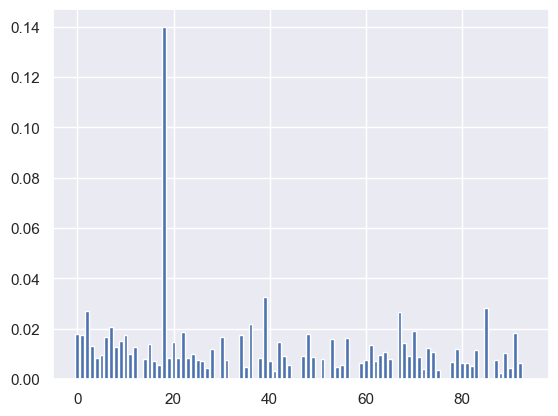

In [38]:
listx=[]
for i,v in enumerate(importance):
 print(f'Feature: {x.columns[i]} ,Score: {v}')
 z = [x.columns[i],v]
 listx.append(z)
# plot feature importance
plt.bar([x for x in range(len(importance))],importance)
plt.show()

In [45]:
listx
for i in range(len(listx)):
    for j in range(i+1,len(listx)):
        if listx[i][1]<listx[j][1]:
            listx[i],listx[j]=listx[j],listx[i]
listx           

[[' Persistent EPS in the Last Four Seasons', 0.13996617],
 [' Borrowing dependency', 0.032483168],
 [' Net Income to Total Assets', 0.027979905],
 [' ROA(B) before interest and depreciation after tax', 0.026976643],
 [' Retained Earnings to Total Assets', 0.026628593],
 [' Debt ratio %', 0.021949217],
 [' After-tax net Interest Rate', 0.02073966],
 [' Current Asset Turnover Rate', 0.018880637],
 [' Per Share Net profit before tax (Yuan �', 0.01870413],
 [' Degree of Financial Leverage (DFL)', 0.018355874],
 [' ROA(C) before interest and depreciation before interest', 0.0179248],
 [' Fixed Assets Turnover Frequency', 0.017630497],
 [' Interest Expense Ratio', 0.017606713],
 [' ROA(A) before interest and % after tax', 0.01747009],
 [' Operating Expense Rate', 0.017387275],
 [' Total Asset Return Growth Rate Ratio', 0.016743671],
 [' Pre-tax net Interest Rate', 0.016549144],
 [' Cash/Total Assets', 0.016343487],
 [' Working Capital to Total Assets', 0.01581237],
 [' Continuous interest r

In [ ]:
[' Persistent EPS in the Last Four Seasons', 0.13996617],
 [' Borrowing dependency', 0.032483168]
[' Net Income to Total Assets', 0.027979905]
 [' ROA(B) before interest and depreciation after tax', 0.026976643], 
[' Retained Earnings to Total Assets’,
0.026628593]
 [' Debt ratio %', 0.021949217]
 [' After-tax net Interest Rate’,0.02073966],
 [' Current Asset Turnover Rate', 0.018880637] 
[' Fixed Assets Turnover Frequency', 0.017630497]


 0 feature importance columns-
[' Current Liability to Equity', 0.0],
 [' Interest-bearing debt interest rate', 0.0],
 [' Accounts Receivable Turnover', 0.0],
 [' Long-term Liability to Current Assets', 0.0],
 [' Average Collection Days', 0.0],
 [' Net Value Growth Rate', 0.0],
 [' Quick Assets/Current Liability', 0.0],
 [' Liability-Assets Flag', 0.0],
 [' Cash/Current Liability', 0.0],
 [' Total assets to GNP price', 0.0],
 [' Current Ratio', 0.0],
 [' Net worth/Assets', 0.0],
 [' Revenue per person', 0.0],
 [' Quick Ratio', 0.0],
 [' Allocation rate per person', 0.0],
 [' Current Liability to Liability', 0.0],
 [' Equity to Liability', 0.0]

In [41]:
listx[0][1]

0.0179248

In [40]:
max(importance)

0.13996617

In [61]:
importance

array([1.38720046e-02, 6.91573439e-03, 1.49862991e-02, 6.81118052e-03,
       8.03812390e-03, 9.09138718e-03, 8.50564250e-03, 4.07733348e-03,
       1.59444273e-02, 1.07072504e-02, 7.66648230e-03, 1.57004757e-02,
       6.47459822e-03, 4.03324986e-04, 2.04219894e-03, 1.46558060e-02,
       6.58294918e-03, 5.94986302e-03, 1.14867086e-01, 8.14754320e-03,
       3.55631389e-05, 5.33953362e-03, 1.06953113e-02, 1.47356674e-02,
       1.08371929e-02, 5.32436570e-03, 6.84766245e-03, 1.23625806e-02,
       9.33215015e-03, 5.89819588e-05, 1.91708236e-02, 1.10458534e-02,
       0.00000000e+00, 0.00000000e+00, 3.82832976e-02, 7.19528833e-04,
       6.20677686e-03, 6.19898505e-03, 7.64193949e-03, 4.52290956e-02,
       1.12109526e-02, 7.88952706e-03, 4.07630289e-02, 7.81655758e-03,
       7.40122460e-03, 4.55924874e-05, 0.00000000e+00, 1.07281639e-02,
       1.83665831e-02, 5.94458517e-03, 0.00000000e+00, 1.00030435e-02,
       1.88274462e-04, 9.51330037e-03, 6.05890781e-03, 4.62813139e-03,
      

In [83]:
imp = np.sort(importance)[::-1]
imp

array([0.13996617, 0.03248317, 0.0279799 , 0.02697664, 0.02662859,
       0.02194922, 0.02073966, 0.01888064, 0.01870413, 0.01835587,
       0.0179248 , 0.0176305 , 0.01760671, 0.01747009, 0.01738727,
       0.01674367, 0.01654914, 0.01634349, 0.01581237, 0.01514137,
       0.01471166, 0.01463331, 0.01415672, 0.0137073 , 0.01360369,
       0.0131902 , 0.01269616, 0.01263633, 0.01218194, 0.01188368,
       0.01187159, 0.01125808, 0.01079251, 0.01061624, 0.01024539,
       0.0097544 , 0.00974323, 0.00943592, 0.00932793, 0.00915207,
       0.00911778, 0.00908362, 0.00878379, 0.00862922, 0.00838826,
       0.00822757, 0.00818872, 0.00815485, 0.00815324, 0.00804878,
       0.00795695, 0.00777496, 0.00739985, 0.00738354, 0.00737499,
       0.00736924, 0.00721132, 0.00719   , 0.00713534, 0.00711645,
       0.00657693, 0.00644939, 0.0063529 , 0.00625915, 0.00621924,
       0.00565378, 0.0054798 , 0.00538052, 0.00527784, 0.00482822,
       0.00454249, 0.00443399, 0.00421303, 0.00403406, 0.00347